<a href="https://colab.research.google.com/github/sumeet022/SmallCapStocks/blob/main/SmallCapStocks_Bse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import glob
import pandas as pd
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
# !pip install datasets transformers
b = pd.read_csv(r"/content/BseLargeDeals")
ClientSheet = pd.read_csv(r"/content/ClientNames.csv")
b = b.drop_duplicates()
new_column_names = {
    'deal Date': 'date',
    'deal Type *': 'type',
    'price **': 'price',
    'security Name':'security_name',
    'client Name':'client_name'
    # Add more mappings as needed
}
# Use the rename() method to rename columns
end_date = datetime.now()
start_date = end_date - timedelta(days=7)
b = b.rename(columns=new_column_names)
bse = b.iloc[:,[0,2,3,4,5,6]]
replace_dict = {'S': 'SELL', 'B': 'BUY'}
b['type'].replace(replace_dict, inplace=True)
b['price'] = b['price'].apply(lambda x: re.sub(r'[^\d.]', '', x))
b['price'] = b['price'].astype(float)

# This part is to filter out unique elements where the people only brought and sold the shares not on the same day

filtered_df = b[~b.groupby(['date', 'client_name'])['type'].transform(lambda x: x.nunique() == 2)]
# Now, filter out rows for each client where they bought and sold on the same day
result_df = filtered_df.groupby(['date', 'client_name']).filter(lambda x: len(x) < 2)

In [22]:
LessThan10_GreaterThan5 = result_df[(result_df['price'] > 5) & (result_df['price'] < 10)]
LessThan5_GreaterThan4 = result_df[(result_df['price'] < 5) & (result_df['price'] > 4)]
LessThan4_GreaterThan3 = result_df[(result_df['price'] < 4) & (result_df['price'] > 3)]
LessThan3_GreaterThan2 = result_df[(result_df['price'] < 3) & (result_df['price'] > 2)]
LessThan2 = result_df[(result_df['price'] < 2)]
LessThan20_GreaterThan10 = result_df[(result_df['price'] > 10) & (result_df['price'] < 20)]
LessThan30_GreaterThan20 = result_df[(result_df['price'] > 20) & (result_df['price'] < 30)]
LessThan100_GreaterThan30 = result_df[(result_df['price'] > 30)]
result_df['date'] = pd.to_datetime(result_df['date'])
LessThan10_GreaterThan5_1week = result_df[(result_df['price'] > 5) & (result_df['price'] < 10) & (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan5_GreaterThan4_1week = result_df[(result_df['price'] < 5) & (result_df['price'] > 4) & (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan4_GreaterThan3_1week = result_df[(result_df['price'] < 4) & (result_df['price'] > 3)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan3_GreaterThan2_1week = result_df[(result_df['price'] < 3) & (result_df['price'] > 2)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan2_1week = result_df[(result_df['price'] < 2)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan20_GreaterThan10_1week = result_df[(result_df['price'] > 10) & (result_df['price'] < 20)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan30_GreaterThan20_1week = result_df[(result_df['price'] > 20) & (result_df['price'] < 30)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan100_GreaterThan30_1week = result_df[(result_df['price'] > 30)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]

In [23]:
LessThan2_1week

,date,security Code,security_name,client_name,type,quantity,price
1514,2024-03-22,505523,MAHACORP,AKSHAY RAJENDRABHAI OSWAL,SELL,"8,410,190",1.23
1716,2024-03-27,539470,SHREEGANES,NEW ERA FUND LIMITED,SELL,"3,000,000",1.10
1736,2024-03-27,537582,UNISHIRE,KIRTI KANTILAL MEHTA,SELL,"380,000",1.98


In [27]:
LessThan3_GreaterThan2_1week

,date,security Code,security_name,client_name,type,quantity,price
1547,2024-03-22,537582,UNISHIRE,VINAY KIRTI MEHTA,SELL,"130,000",2.13
1612,2024-03-26,511447,SYLPH,SWETSAM STOCK HOLDING PRIVATE LIMITED,SELL,"830,023",2.88
1614,2024-03-26,537582,UNISHIRE,VINAY KIRTI MEHTA,SELL,"250,000",2.09
1617,2024-03-26,532378,UNIVARTS,MANISH GARODIA,SELL,"184,431",2.14
1618,2024-03-26,532378,UNIVARTS,ASHA JAYRAJ,BUY,"200,000",2.14
1624,2024-03-27,541303,AKSHAR,NIKHIL RAJESH SINGH,BUY,"2,697,155",2.49


In [24]:
LessThan4_GreaterThan3_1week

,date,security Code,security_name,client_name,type,quantity,price


In [25]:
LessThan5_GreaterThan4_1week

,date,security Code,security_name,client_name,type,quantity,price
1528,2024-03-22,531494,NAVKAR,SIDDHANT SHIRISH SHAH,BUY,"2,000,000",4.69
1531,2024-03-22,542206,NIVAKA,MALANI WEALTH ADVISORS PRIVATE LIMITED,BUY,"1,674,581",4.14
1572,2024-03-26,543521,FONE4,SUMANTEKRIWAL,BUY,"110,000",4.16
1573,2024-03-26,543521,FONE4,KRISHNA MURARI TEKRIWAL,SELL,"100,000",4.12
1574,2024-03-26,539486,GEETANJ,LEELAMMATHENUMKALJOSEPH,BUY,"83,944",4.15
1575,2024-03-26,539486,GEETANJ,SOHAM MULTITRADE,SELL,"69,610",4.15
1599,2024-03-26,500366,ROLTA,MAHENDRA SHARMA,BUY,"1,000,000",4.92
1688,2024-03-27,535205,MYSTICELE,SHETAL SATISHKUMAR SHAH,BUY,"230,000",4.25
1689,2024-03-27,535205,MYSTICELE,INNOVATE SECURITIES PVT L,BUY,"117,000",4.25
1690,2024-03-27,535205,MYSTICELE,JITENDRAKUMAR GHEVERCHAND JAIN,SELL,"422,846",4.25


In [26]:
LessThan10_GreaterThan5_1week

,date,security Code,security_name,client_name,type,quantity,price
1469,2024-03-22,543319,AAPLUSTRAD,SHAH DIPAK KANAYALAL,BUY,"104,000",9.41
1491,2024-03-22,539222,GROWINGTON,SANJAY KARANRAJ SAKARIA,BUY,"878,825",6.32
1492,2024-03-22,539222,GROWINGTON,PROGNOSIS SECURITIES PVT. LTD.,SELL,"900,000",6.32
1500,2024-03-22,524614,INDXTRA,KALPANABEN CHAMPAKLAL SHAH,SELL,"545,226",9.97
1501,2024-03-22,524614,INDXTRA,MITA HARDIK THAKKAR,SELL,"300,000",9.55
1502,2024-03-22,524614,INDXTRA,RDS CORPORATE SERVICES PRIVATE LIMITED,SELL,"368,956",9.55
1524,2024-03-22,531832,NAGTECH,GLASTON MARIO MENEZES,BUY,"60,000",9.92
1525,2024-03-22,531832,NAGTECH,BHAVANI NADIMPALLI,SELL,"117,200",9.86
1550,2024-03-26,538351,AFEL,GULZARSINGH NAGPAL,BUY,"94,500",5.70
1561,2024-03-26,504340,CONFINT,KUBER EQUITY SERVICES LLP,SELL,"592,181",7.70


In [21]:
LessThan10_GreaterThan5_1week

,date,security Code,security_name,client_name,type,quantity,price
1469,2024-03-22,543319,AAPLUSTRAD,SHAH DIPAK KANAYALAL,BUY,"104,000",9.41
1491,2024-03-22,539222,GROWINGTON,SANJAY KARANRAJ SAKARIA,BUY,"878,825",6.32
1492,2024-03-22,539222,GROWINGTON,PROGNOSIS SECURITIES PVT. LTD.,SELL,"900,000",6.32
1500,2024-03-22,524614,INDXTRA,KALPANABEN CHAMPAKLAL SHAH,SELL,"545,226",9.97
1501,2024-03-22,524614,INDXTRA,MITA HARDIK THAKKAR,SELL,"300,000",9.55
1502,2024-03-22,524614,INDXTRA,RDS CORPORATE SERVICES PRIVATE LIMITED,SELL,"368,956",9.55
1524,2024-03-22,531832,NAGTECH,GLASTON MARIO MENEZES,BUY,"60,000",9.92
1525,2024-03-22,531832,NAGTECH,BHAVANI NADIMPALLI,SELL,"117,200",9.86
1550,2024-03-26,538351,AFEL,GULZARSINGH NAGPAL,BUY,"94,500",5.70
1561,2024-03-26,504340,CONFINT,KUBER EQUITY SERVICES LLP,SELL,"592,181",7.70


In [28]:
LessThan20_GreaterThan10_1week

,date,security Code,security_name,client_name,type,quantity,price
1466,2024-03-22,543319,AAPLUSTRAD,MAHENDRA GIRDHARILAL WADHWANI,BUY,"200,000",10.06
1470,2024-03-22,543319,AAPLUSTRAD,DEV ANIL LALCHETA,SELL,"48,000",10.08
1471,2024-03-22,543319,AAPLUSTRAD,NEETABEN ANILKUMAR LALCHETA,SELL,"112,000",10.08
1489,2024-03-22,513309,GOLKONDA,DEEPAK MAHAVEERCHAND JAIN (HUF),SELL,"30,000",15.38
1490,2024-03-22,513309,GOLKONDA,DEEPAK JAIN,BUY,"40,000",15.30
1493,2024-03-22,524614,INDXTRA,ROMIT CHAMPAKLAL SHAH,SELL,"1,505,000",10.20
1494,2024-03-22,524614,INDXTRA,RONIT CHAMPAKLAL SHAH,SELL,"1,703,560",10.15
1496,2024-03-22,524614,INDXTRA,VIVEKLAKRA,BUY,"983,430",10.20
1497,2024-03-22,524614,INDXTRA,TABREZ AHMED,BUY,"218,773",10.20
1498,2024-03-22,524614,INDXTRA,SUMIT SINGHANIA,BUY,"1,002,000",10.20


In [29]:
LessThan30_GreaterThan20_1week

,date,security Code,security_name,client_name,type,quantity,price
1532,2024-03-22,538742,PANABYTE,RAIBEN GOVINDBHAI PATEL,BUY,"24,205",24.50
1533,2024-03-22,538742,PANABYTE,NIKIT D RAMBHIA,SELL,"47,805",24.39
1534,2024-03-22,541703,RACONTEUR,ANNAYA MANAGEMENT CONSULTANCY PRIVATE LIMITED .,SELL,"19,200",23.92
1542,2024-03-22,530025,SAMYAKINT,SAMYAK JAIN,BUY,"41,760",23.46
1543,2024-03-22,530025,SAMYAKINT,RAJESH KUMAR GARG,SELL,"40,100",23.46
1552,2024-03-26,530429,ASHISHPO,SWATI SATISH SWAMY,SELL,"23,500",28.49
1553,2024-03-26,530429,ASHISHPO,SATISHGURAYYASWAMI,BUY,"23,500",28.49
1556,2024-03-26,524606,BERLDRG,SAMIR NARENDRA GUPTA,SELL,"85,170",29.00
1557,2024-03-26,524606,BERLDRG,HINDON TRADERS & BROKERS PRIVATE LIMITED,BUY,"85,000",29.00
1560,2024-03-26,530249,BRIDGESE,RONAKKUMAR SANJAYBHAI PATEL,SELL,"17,150",22.73


In [30]:
LessThan100_GreaterThan30_1week

,date,security Code,security_name,client_name,type,quantity,price
1472,2024-03-22,513119,ABCGAS,GOPALKUMAR BHIKHALAL BALDHA,BUY,"39,100",56.21
1473,2024-03-22,511359,ADMANUM,SATYA PRAKASH MITTAL,SELL,"40,000",54.00
1474,2024-03-22,511359,ADMANUM,SATYA PRAKASH MITTAL HUF,BUY,"40,000",54.00
1475,2024-03-22,543497,BCCL,SKY WANDERERS LLP,SELL,"120,000",51.42
1476,2024-03-22,543497,BCCL,NNM SECURITIES PVT LTD,BUY,"160,000",51.34
...,...,...,...,...,...,...,...
1730,2024-03-27,542765,TRANSPACT,OPTUME INVESTMENTS,BUY,"7,000",394.20
1731,2024-03-27,542765,TRANSPACT,VASANT BALIRAMPANT BELORKAR,SELL,"20,000",394.20
1734,2024-03-27,520056,TVSHLTD,SUNDARAM FINANCE HOLDINGS LIMITED,SELL,"202,321",8138.90
1735,2024-03-27,520056,TVSHLTD,VS TRUST,BUY,"202,321",8138.90


In [11]:
TruestedNames = result_df[result_df['client_name'].isin(ClientSheet['Client_Name'])]
TruestedNames

,date,security Code,security_name,client_name,type,quantity,price
399,29/02/2024,533629,TIJARIA,F3 ADVISORS PRIVATE LIMITED,SELL,"150,000",11.07
1167,15/03/2024,543490,GMRP&UI,F3 ADVISORS PRIVATE LIMITED,BUY,"15,781,116",42.60
1231,18/03/2024,531723,GATECH,MULTIPLIER SHARE & STOCK ADVISORS PRIVATE LIMITED,BUY,"1,736,844",1.21
1358,20/03/2024,531592,GENPHARMA,F3 ADVISORS PRIVATE LIMITED,SELL,"5,813,842",2.20


In [12]:
Names = result_df[result_df['security_name']=='TIJARIA']
Names

,date,security Code,security_name,client_name,type,quantity,price
399,29/02/2024,533629,TIJARIA,F3 ADVISORS PRIVATE LIMITED,SELL,"150,000",11.07
400,29/02/2024,533629,TIJARIA,ASHOK CHANDRAKANT SAMANI,BUY,"205,000",11.07
595,04/03/2024,533629,TIJARIA,NAV CAPITAL VCC - NAV CAPITAL EMERGING STAR FUND,BUY,"241,791",12.81
1014,12/03/2024,533629,TIJARIA,NAV CAPITAL VCC - NAV CAPITAL EMERGING STAR FUND,BUY,"362,186",15.87


In [13]:
Names = result_df[result_df['security_name']=='SCANPGEOM']
Names

,date,security Code,security_name,client_name,type,quantity,price
455,01/03/2024,526544,SCANPGEOM,MISHA ASHISH SHAH,BUY,"500,000",5.50
456,01/03/2024,526544,SCANPGEOM,SHAH ASHISH NAVNITLAL HUF,BUY,"500,000",5.50
457,01/03/2024,526544,SCANPGEOM,ASHISH N SHAH,BUY,"984,320",5.56
649,05/03/2024,526544,SCANPGEOM,MISHA ASHISH SHAH,BUY,"500,000",5.65
650,05/03/2024,526544,SCANPGEOM,HENA ASHISH SHAH,BUY,"500,000",5.65
651,05/03/2024,526544,SCANPGEOM,SWAPNEEL A SHAH,BUY,"1,000,000",5.65
652,05/03/2024,526544,SCANPGEOM,MAYUR MUKUNDBHAI DESAI,SELL,"2,000,000",5.65
834,07/03/2024,526544,SCANPGEOM,GAURANG PARMANAND SHAH,BUY,"978,000",5.81
835,07/03/2024,526544,SCANPGEOM,MAYUR MUKUNDBHAI DESAI,SELL,"978,742",5.81


In [14]:
result_df['date'] = pd.to_datetime(result_df['date'])
one_month_ago = datetime.now() - timedelta(days=30)  # Assuming 30 days as a month
df_last_month = result_df[result_df['date'] >= one_month_ago]
security_counts = df_last_month['security_name'].value_counts()
with_price = df_last_month[['security_name','type','price']]
top_10_security = security_counts.head(10)
security_counts

<ipython-input-14-a336f70db1d0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  result_df['date'] = pd.to_datetime(result_df['date'])


THINKINK      30
INDXTRA       26
GOLKONDA      25
RACONTEUR     19
DELTA         16
              ..
GANHOLD        1
INNOVATIVE     1
KFINTECH       1
OMEGAIN        1
ZODJRDMKJ      1
Name: security_name, Length: 304, dtype: int64

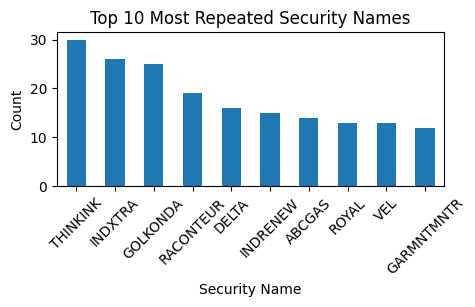

In [15]:
plt.figure(figsize=(5, 2))
top_10_security.plot(kind='bar')
plt.title('Last Month Top 10 Most Repeated Security Names')
plt.xlabel('Security Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
top_10_df = df_last_month[df_last_month['security_name'].isin(top_10_security.index)]
pivot_df = top_10_df.pivot_table(index='security_name', columns='type', aggfunc='size', fill_value=0)
fig = px.bar(pivot_df, x=pivot_df.index, y=pivot_df.columns,barmode='group', title='Top 10 Most Repeated Security Names with Types Count')
fig.update_layout(xaxis_tickangle=-15)
fig.show()